In [1]:
import pandas as pd

# Read the Excel file
df = pd.read_excel(r"C:\Users\avtha\Desktop\University\Semester 4\Master thesis\Data\finalized_data.xlsx")

#Add index column
df['id'] = range(1, len(df) + 1)

#Classify cleaned_feedback by ship_id
ship_ids = df['ship_id'].unique()

for ship_id in ship_ids:
    ship_df = df[df['ship_id'] == ship_id]
    output_file = f"ship_{ship_id}_feedback.xlsx"
    ship_df.to_excel(output_file, index=False)

    print(f"Feedbacks for Ship ID {ship_id} saved to {output_file}")

Feedbacks for Ship ID 0 saved to ship_0_feedback.xlsx
Feedbacks for Ship ID 1 saved to ship_1_feedback.xlsx
Feedbacks for Ship ID 2 saved to ship_2_feedback.xlsx
Feedbacks for Ship ID 3 saved to ship_3_feedback.xlsx
Feedbacks for Ship ID 4 saved to ship_4_feedback.xlsx
Feedbacks for Ship ID 5 saved to ship_5_feedback.xlsx
Feedbacks for Ship ID 6 saved to ship_6_feedback.xlsx
Feedbacks for Ship ID 8 saved to ship_8_feedback.xlsx
Feedbacks for Ship ID 9 saved to ship_9_feedback.xlsx
Feedbacks for Ship ID 10 saved to ship_10_feedback.xlsx
Feedbacks for Ship ID 11 saved to ship_11_feedback.xlsx
Feedbacks for Ship ID 12 saved to ship_12_feedback.xlsx
Feedbacks for Ship ID 13 saved to ship_13_feedback.xlsx
Feedbacks for Ship ID 14 saved to ship_14_feedback.xlsx
Feedbacks for Ship ID 15 saved to ship_15_feedback.xlsx
Feedbacks for Ship ID 16 saved to ship_16_feedback.xlsx
Feedbacks for Ship ID 17 saved to ship_17_feedback.xlsx
Feedbacks for Ship ID 18 saved to ship_18_feedback.xlsx
Feedbacks 

wordcloud for ship#1

c:\Users\avtha\anaconda3\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


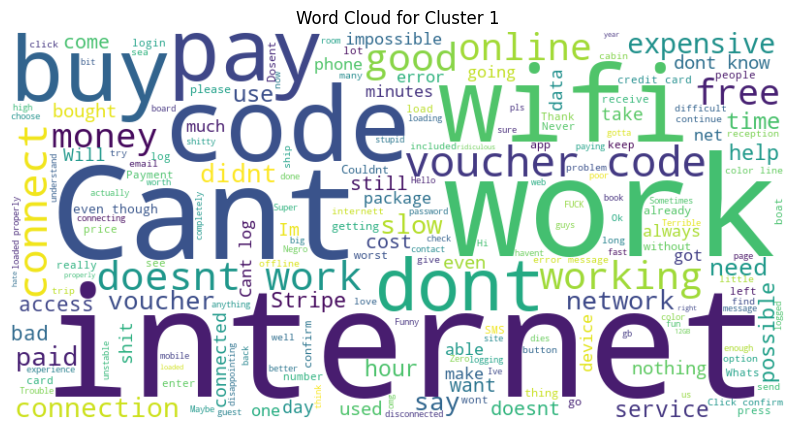

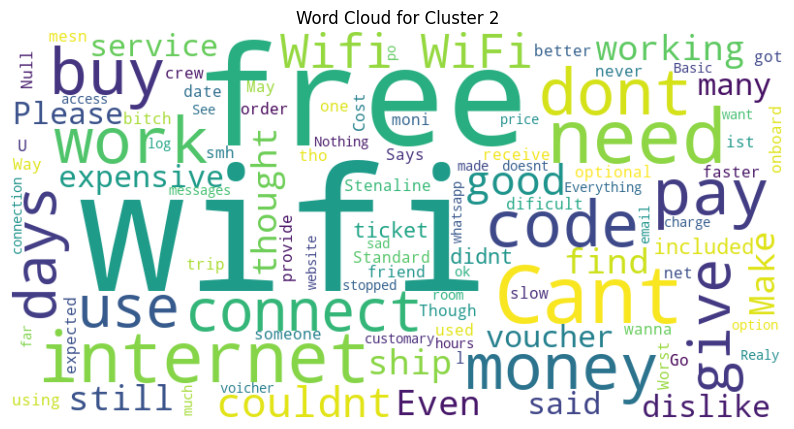

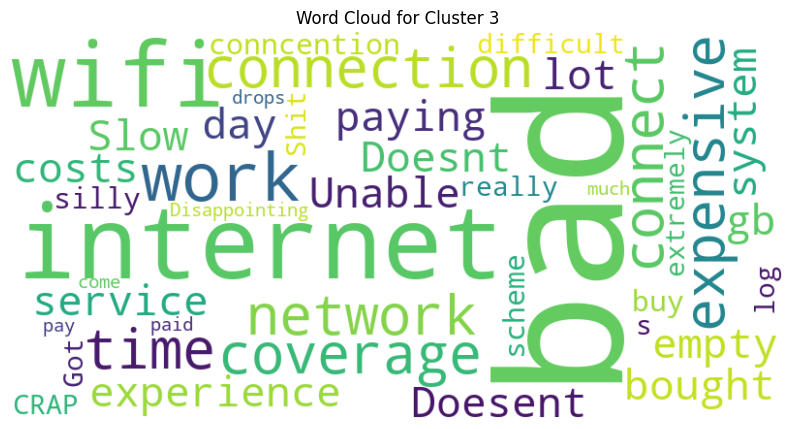

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Read the Excel file
file_path = r"C:\Users\avtha\Desktop\University\Semester 4\Master thesis\output\ship-wise classification\ship_1_feedback.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# Perform sentiment analysis and clustering on cleaned_feedback
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_feedback'])

# Define number of clusters (you may need to adjust this)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)
clusters = kmeans.labels_.tolist()

# Add cluster labels to DataFrame
df['cluster'] = clusters

# Save DataFrame to the same Excel file with different sheets for each cluster
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    for cluster_num in range(num_clusters):
        cluster_df = df[df['cluster'] == cluster_num]
        cluster_df.to_excel(writer, sheet_name=f'cat{cluster_num+1}', index=False)

# Visualize clusters using word clouds
for cluster_num in range(num_clusters):
    cluster_df = df[df['cluster'] == cluster_num]
    feedback_text = ' '.join(cluster_df['cleaned_feedback'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_num+1}')
    plt.axis('off')
    plt.show()


wordcloud for ship_id_2 #no.of cluster 7

c:\Users\avtha\anaconda3\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


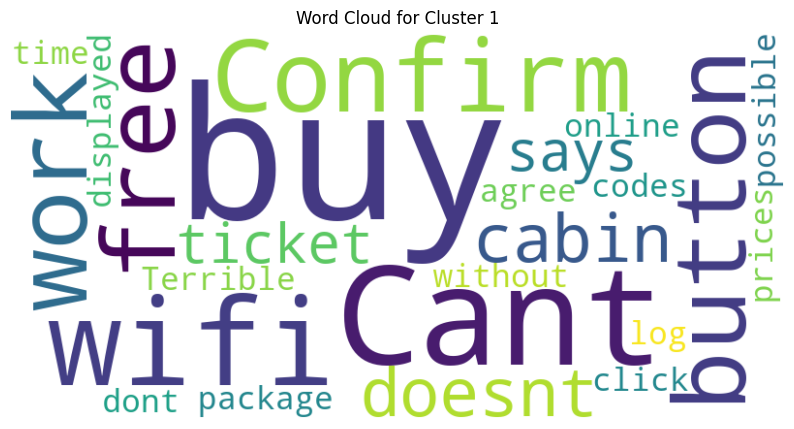

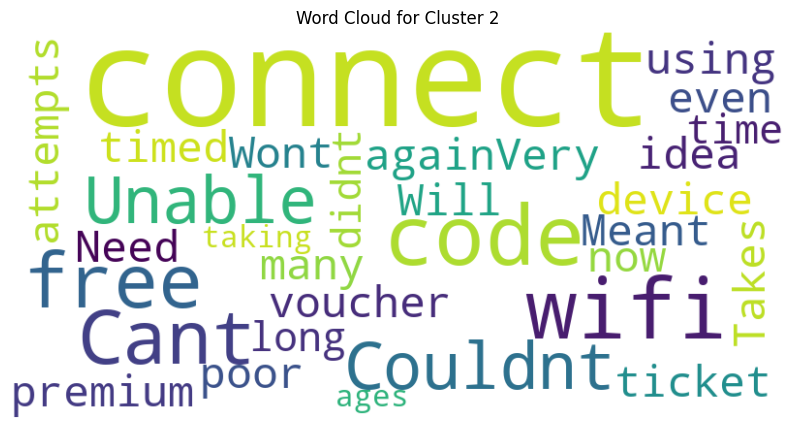

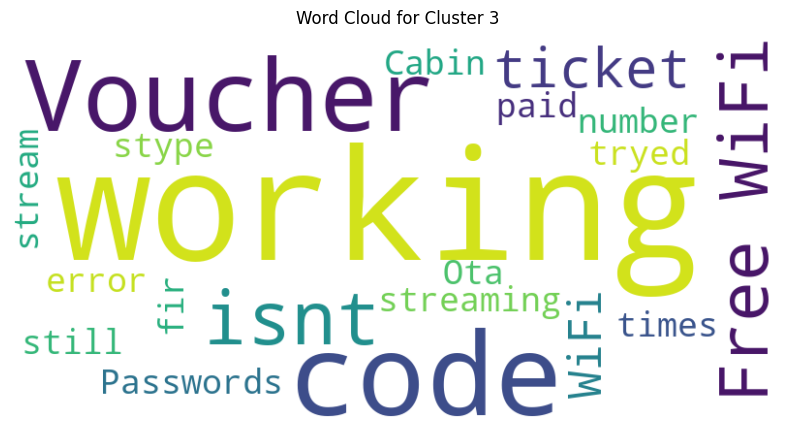

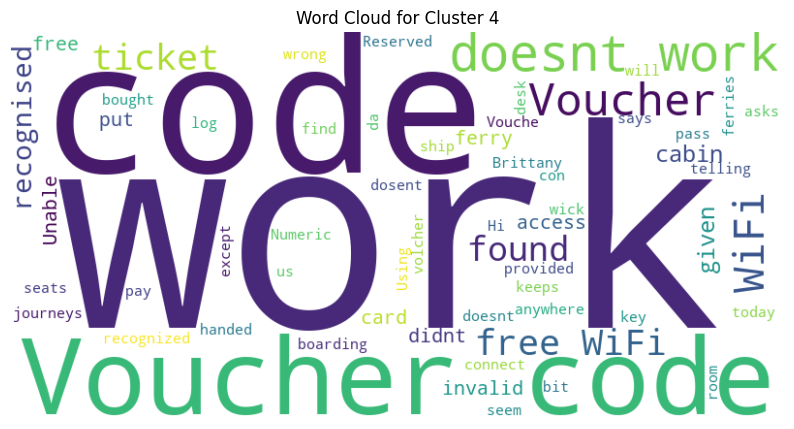

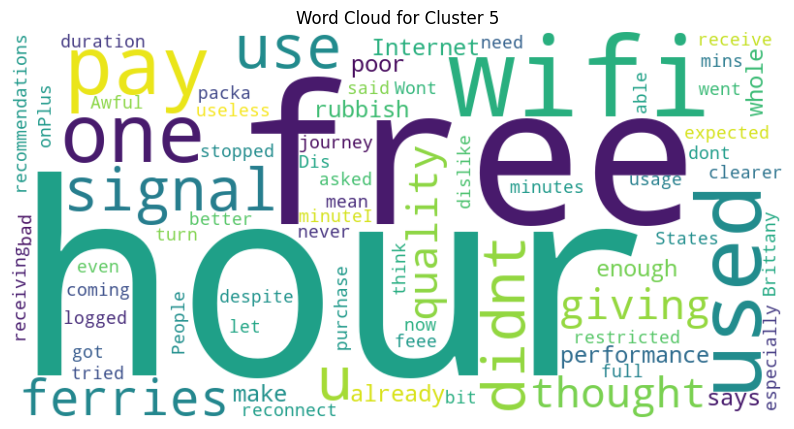

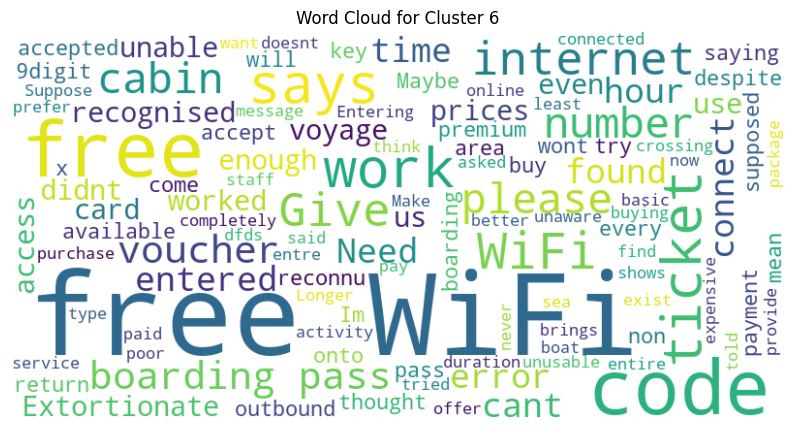

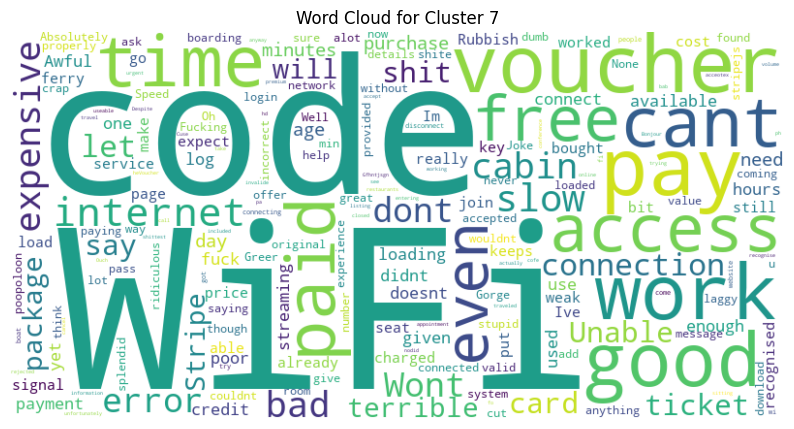

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the Excel file
file_path = r"C:\Users\avtha\Desktop\University\Semester 4\Master thesis\output\ship-wise classification\ship_2_feedback.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# Make a copy of the original DataFrame
original_df = df.copy()

# Perform sentiment analysis and clustering on cleaned_feedback
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_feedback'])

# Define number of clusters (you may need to adjust this)
num_clusters =7
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)
clusters = kmeans.labels_.tolist()

# Add cluster labels to DataFrame
df['cluster'] = clusters

# Save DataFrame to the same Excel file with different sheets for each cluster
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    # Save the original DataFrame in a sheet named 'original'
    original_df.to_excel(writer, sheet_name='original', index=False)
    
    # Save categorized feedbacks in separate sheets
    for cluster_num in range(num_clusters):
        cluster_df = df[df['cluster'] == cluster_num]
        cluster_df.to_excel(writer, sheet_name=f'cat{cluster_num+1}', index=False)

# Visualize clusters using word clouds
for cluster_num in range(num_clusters):
    cluster_df = df[df['cluster'] == cluster_num]
    feedback_text = ' '.join(cluster_df['cleaned_feedback'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_num+1}')
    plt.axis('off')
    plt.show()
